# Lab 3 : Graph  Search
---

# Import Dependencies

In [8]:
import csv
from matplotlib import pyplot as plt
import numpy as np
import math
from typing import List

# Load CSV

In [9]:
class Vertex:
    """
    Vertex class defined by x and y coordinate.
    """
    # constructor or initializer of vertex class

    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def dist(self, p: "Vertex"):
        """
        Return distance between vertices
         Parameters:
            p: input vertex to calculate distance to.
         Returns:
            Distance to vertex from this vertex object
        """

        return math.sqrt((self.x - p.x)**2 + (self.y - p.y)**2)

    # method to define print() function of object vertex
    def __str__(self):
        return "({}, {})".format(np.round(self.x, 2), np.round(self.y, 2))

    # method to define print() function of list[] of object vertex
    def __repr__(self):
        return "({}, {})".format(np.round(self.x, 2), np.round(self.y, 2))


def plot(vertices, edges):

    for v in vertices:
        plt.plot(v.x, v.y, 'r+')

    for e in edges:
        plt.plot([vertices[e[0]].x, vertices[e[1]].x],
                 [vertices[e[0]].y, vertices[e[1]].y],
                 "g--")

    for i, v in enumerate(vertices):
        plt.text(v.x + 0.2, v.y, str(i))
    plt.axis('equal')

def plot_path(vertices, path):


    for i in range(len(path)-1):
        plt.plot([vertices[path[i]].x, vertices[path[i+1]].x],
                 [vertices[path[i]].y, vertices[path[i+1]].y],
                 "r")

   
    plt.axis('equal')

def load_vertices_from_file(filename: str):
    # list of vertices
    vertices: List[Vertex] = []
    with open(filename, newline='\n') as csvfile:
        v_data = csv.reader(csvfile, delimiter=",")
        next(v_data)
        for row in v_data:
            vertex = Vertex(float(row[1]), float(row[2]))
            vertices.append(vertex)
    return vertices


def load_edges_from_file(filename: str):
    edges = []
    with open(filename, newline='\n') as csvfile:
        reader = csv.reader(csvfile, delimiter=",")
        next(reader)
        for row in reader:
            edges.append((int(row[0]), int(row[1])))
    return edges





# A* Class 

In [10]:
class AstarPathPlanning():
    def __init__(self,vertices,edges, goal, start):
        
        self.vertices = vertices
        self.edges = edges
        self.goal_id = goal
        self.start_id = start
        self.map = self.construct_map()
        self.goal = self.map[goal] #id of goal 
        self.start = self.map[start] #id of start

    def a_star_path_planning(self):
        openSet = [self.start["id"]] # store id of vertex
        
        cameFrom = [None] * len(self.map)

        gScore =  [999999] * len(self.map)
        gScore[self.start["id"]] = 0

        fScore =  [999999] * len(self.map)
        fScore[self.start["id"]] = gScore[self.start["id"]] + self.map[self.start["id"]]["heuristic"]

        while openSet != []:
            fScore_list = []
            current_score = 999999
            for node in openSet:
                if fScore[node] < current_score:
                    current_node = node
                    current_score =  fScore[node]
            current = self.map[current_node]
            
            if current["id"] == self.goal["id"]:
                 return self.reconstruct_path(cameFrom,current)
            
            openSet.remove(current["id"])

            for n in current["neighbors"]:
                neighbor = self.map[n]
                tentative_gScore = gScore[current["id"]] + self.cal_vertex_dis(current["id"],neighbor["id"])
                
                if tentative_gScore < gScore[neighbor["id"]]:
                    cameFrom[neighbor["id"]] = current["id"]
                    gScore[neighbor["id"]] = tentative_gScore
                    fScore[neighbor["id"]] = gScore[neighbor["id"]] + neighbor["heuristic"]
                    if neighbor["id"] not in openSet:
                        openSet.append(neighbor["id"])
        return None
            
    def reconstruct_path(self, cameFrom, current):
        current_id = current["id"]
        total_path = [current_id]
        
        while current_id != self.start["id"]:
            current_id  = cameFrom[current_id]
            total_path.append(current_id)
        return total_path


    def construct_map(self):
        """
        Map define as list of dictionary which the index represent the id of vertex
        map = [[{"id":id, "heuristic": score, "neighbors":[id1,id2,id3]}], .......]
        idx = "vertex id"
        """
        map = []
        for i in range(len(self.vertices)):
            node_dict = {"id":i}
            map.append(node_dict)

        for id, m in enumerate(map):
            # add h score for each vertex
            h_score = self.cal_vertex_dis(id,self.goal_id) 
            m.update({"heuristic":h_score})

            # add neigbors for each vetex
            neighbors = []
            for e in self.edges:
                if e[0] == id:
                    neighbors.append(e[1])  
                elif e[1] == id:
                    neighbors.append(e[0])
            m.update({"neighbors": neighbors})
            
        return map
    
    def cal_vertex_dis(self, id1,id2):
        """
        Calculate heuristic score according to the vertex id
        """
        h_score =  ((self.vertices[id1].x - self.vertices[id2].x)**2 + (self.vertices[id1].y - self.vertices[id2].y)**2 )**0.5

        return h_score

In [11]:
import math

def euclidean_distance(v0, v1):
    squared_distance = sum((x - y) ** 2 for x, y in zip(v0, v1))
    distance = math.sqrt(squared_distance)
    return distance

# vertex1:
v0 = (0.6, 8)
v1 = (10.3, 1.5)
distance = euclidean_distance(v0, v1)
print("Euclidean distance:", distance)
heuristics_vertices = []
heuristics_vertices.append(distance)

Euclidean distance: 11.676472069936194


# Main Code 
---

- Load csv file

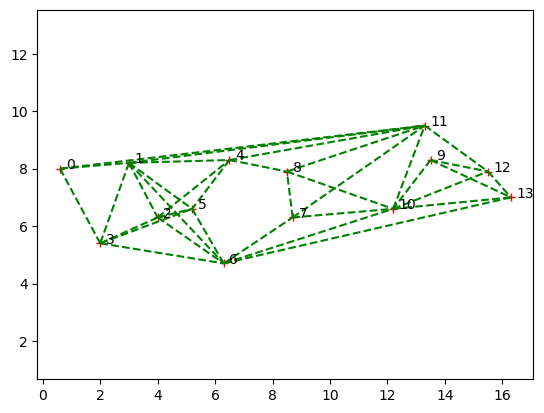

(-0.05, 1.05, -0.05, 1.05)

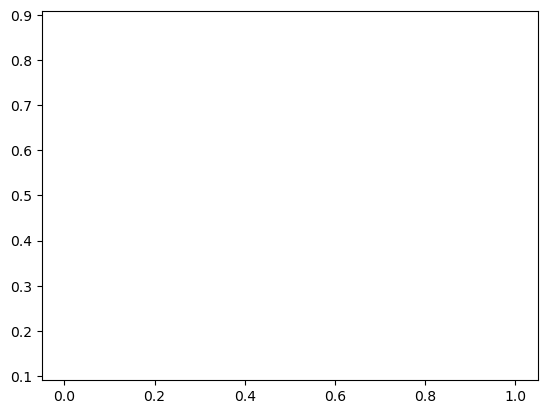

In [12]:
# save each "vertex" in vertices list
vertices = load_vertices_from_file("./data/env_2.csv")

# save each edge in "edges" list
edges = load_edges_from_file("./data/visibility_graph_env_2.csv")

plot(vertices, edges)
plt.show()
plt.axis('equal')

- Run A*

In [13]:
start = 0 
goal = len(vertices) -1

ASTAR = AstarPathPlanning(vertices,edges,goal= goal,start=start)
result = ASTAR.a_star_path_planning()
print("The path of this map are:")
print(result)

The path of this map are:
[13, 10, 8, 4, 1, 0]


- Plot the path

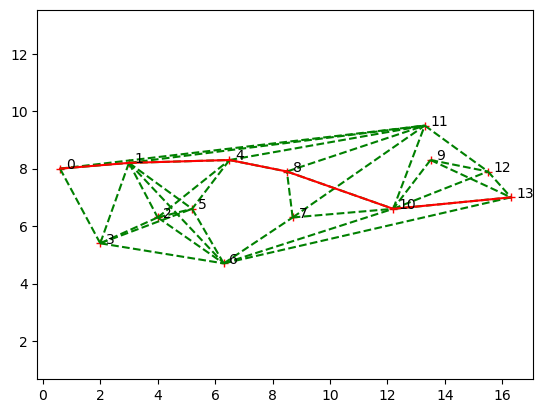

(-0.05, 1.05, -0.05, 1.05)

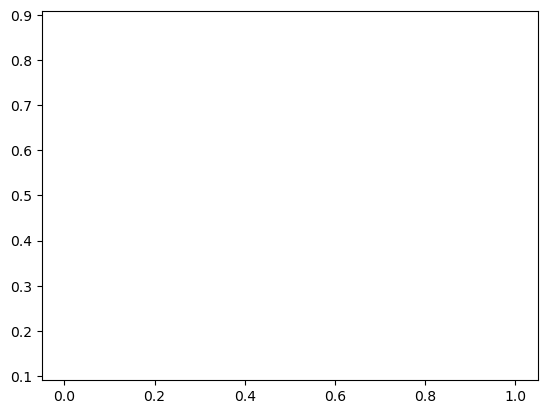

In [14]:
plot(vertices, edges)
plot_path(vertices,result)
plt.show()
plt.axis('equal')